In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
subplot_matrix = []
# No Tap Mun
filelist = ['Eastern', 'Tsuen Wan', 'Tung Chung', 'Yuen Long', 'Kwai Chung', 'Kwun Tong', 'Macau', 'Sha Tin', 'ShamShuiPo']
rcplist = ['rcp26','rcp45','rcp60','rcp85']
directory_import = 'Future Regression/'

In [3]:
def add(station, rcp):
    # Import
    file = filelist[station]
    path = file + '_' + rcp + '.csv'
    df = pd.read_csv(directory_import + path, header=None, low_memory=False)
    df = np.array(df)
    #print(df)
    month = df[:,0][1:]
    v_13 = df[:,1][1:]
    v_13 = np.asfarray(v_13)
    v_50 = df[:,2][1:]
    v_50 = np.asfarray(v_50)
    v_100 = df[:,3][1:]
    v_100 = np.asfarray(v_100)
    # Append to matrix
    subplot_matrix.append([month, v_13, v_50, v_100])

In [4]:
subplot_matrix = []
def draw(rcp):
    fig = plt.figure(figsize=(15, 8))
    for file in range(len(filelist)):
        titles = filelist[file]
        add(file, rcp)
        data = subplot_matrix[file]
        ax = plt.subplot(3, 3, file+1)
        ax.plot(data[0], data[1], label='2013-2017')
        ax.plot(data[0], data[2], label='2046-2050')
        ax.plot(data[0], data[3], label='2096-2100')
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))  # Set Maximum number of x-axis values to show
        plt.title(titles, fontsize=16)
        plt.xlabel('Month')
        plt.ylabel('ppb')
        plt.legend(loc='best')
        ax.grid(True)


    plt.tight_layout()
    directory = "Future Regression/"
    fig.savefig(directory + rcp + 'average comparison.png')


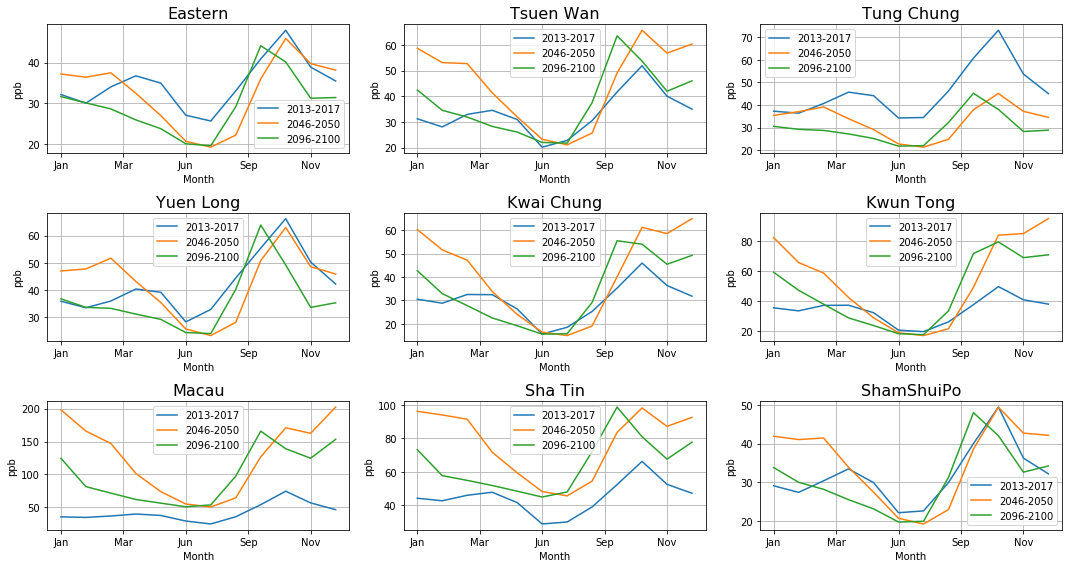

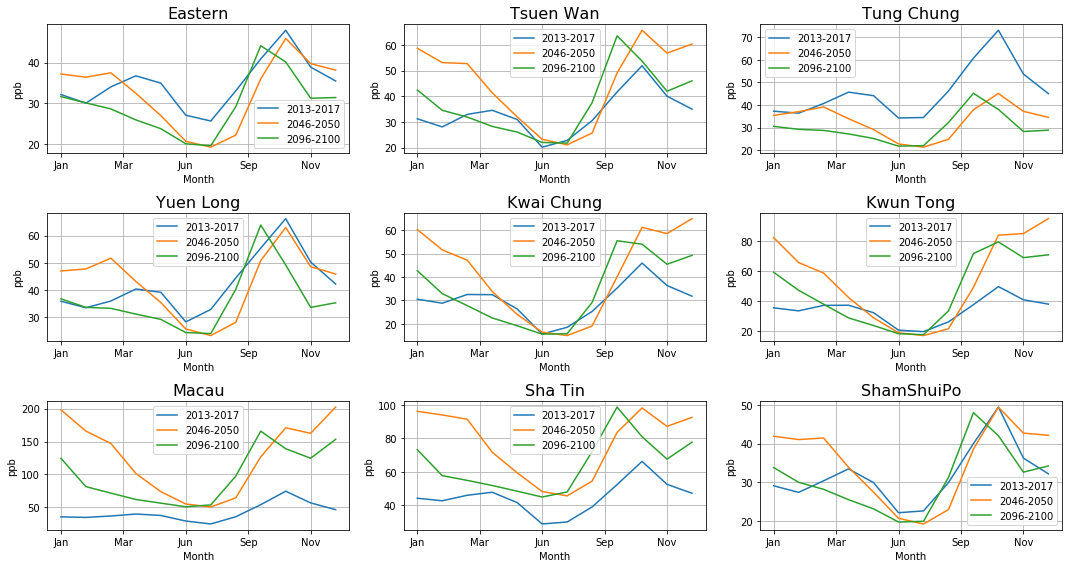

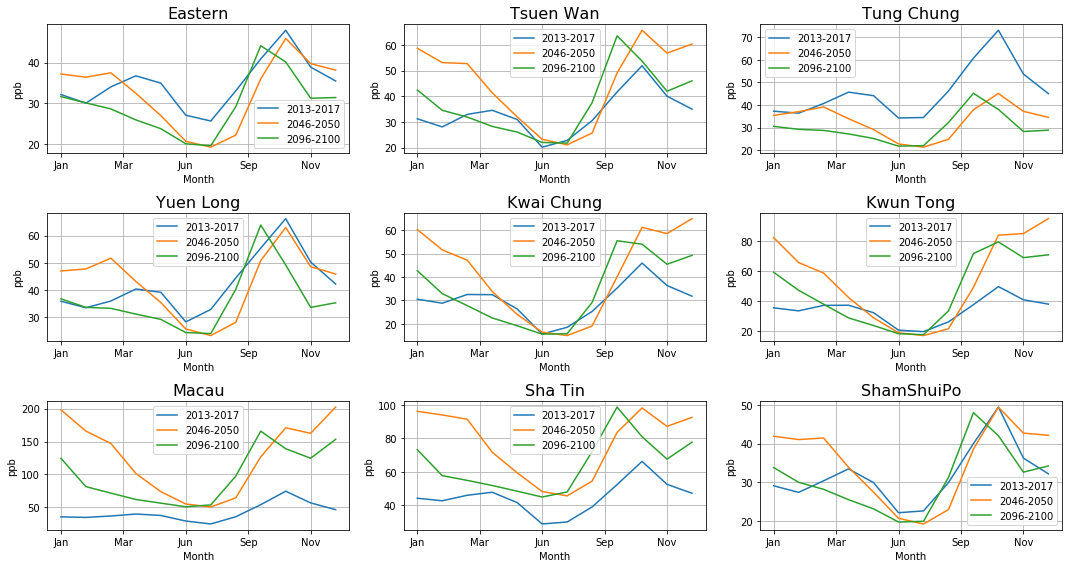

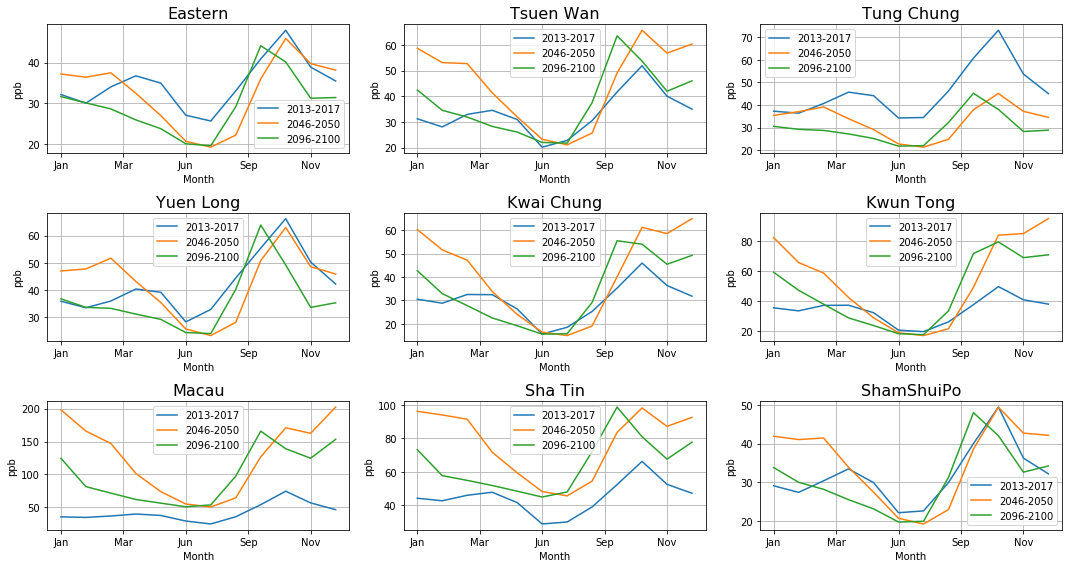

In [5]:
for i in range(len(rcplist)):
    draw(rcplist[i])